<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В3" data-toc-modified-id="Общий-вывод-по-проекту-В3-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><b>Общий вывод по проекту В3</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Проект. Отток клиентов банка**

**Задача:** сохранить текущих клиентов банка

**Цель:** построить модель для прогноза ухода клиента из банка в близайшее время

**Данные:** предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

**План иследования:** провести анализ данных на графиках, построить модели на данных, постороить модели на сбалансированных данных с предельно большим значением F1-меры

## Подготовка данных

In [1]:
# подключим библиотеки

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt



In [2]:
# загрузим и откроем данные для анализа

try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
# проверим данные 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# в основном все данные полные, за исключением Tenure (9%)
# проверим уникальные значения и их кол-во

data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [5]:
# посмотрим данные, где Tenure не заполнены

data.loc[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
# удалять данные нельзя, чтоб не потерять другие ценные данные, поэтому необходимо определить категории, к которой мы присвоим эти данные
# заменим знаечние NaN медианным значением.

# data['Tenure'] = data['Tenure'].fillna(0)
#median_tenure = data.groupby('Tenure')['Tenure'].transform('median')
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data['Tenure'].unique() # проверим корректно ли заполнены медианные значения.

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [7]:
data.info() # проверим заполненны ли данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
# удалим лишние признаки, которые не влияют на отток клиентов: CustomerId, Surname 

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)

In [9]:
# проверим наличие дубликатов. Их нет

data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
# проверим данные на неявные дубликаты

data['CreditScore'].value_counts()
data['Geography'].value_counts()
data['Gender'].value_counts()
data['HasCrCard'].value_counts() # булевые значения
data['IsActiveMember'].value_counts() # булевые значения
data['Exited'].value_counts() # булевые значения

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
# выгрузим статистические данные количественных признаков на предмент анамалий и проверим все ли внесенные правки внесены

data.describe() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Вывод
В предоставленных данных имелись пропуски порядка 9% в данных Tenure (сколько лет клиент является клиентом банка). Данные пропуски могли возникнуть из-за технической ошибки или человеческого фактора. Количество пропусков большое (9%), поэтому удалять нельзя, чтоб не потерять часть данных для исследований. В связи с этим предположим одну из допустимых версий, что при заполнии данных новых клиентов, данный пункт был пропущен, поэтому присвоим всем NaN медианное значение, т.е. это будут новые клиенты банка.
В данных имеются булевые значения в колонках 'HasCrCard', 'IsActiveMember', 'Exited'
Дубликатов явных и неявных в данных выявлено не было.
В названии колонок используются разные регистры написания. Но в связи с тем, что названия сложносочиненные, то было принято решение оставить написание изначальное для лучшей читабельности. Также были удалены 3 колонки, в которых нет необходимости для анализа

## Исследование задачи

In [12]:
# проверим кол-во имеющегося оттока клиентов
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

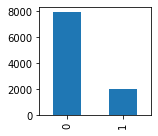

In [13]:
# построим диаграму для визуального восприятия 
 
data['Exited'].value_counts().plot(kind='bar', figsize=(2,2));

#более 20% оттока - это много. Соотношение оставшихся к ушедшим 1 к 4, что говорит о дисбалансе в данных

In [14]:
# создадим таблицу с ушедшими клиентами

exited_1 = data[data['Exited']==1]

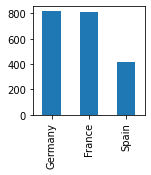

In [15]:
#  построим диаграммы зависимости оттока клиентов от признака.

exited_1['Geography'].value_counts().plot(kind='bar', figsize=(2,2));


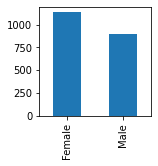

In [16]:
exited_1['Gender'].value_counts().plot(kind='bar', figsize=(2,2));

<AxesSubplot:>

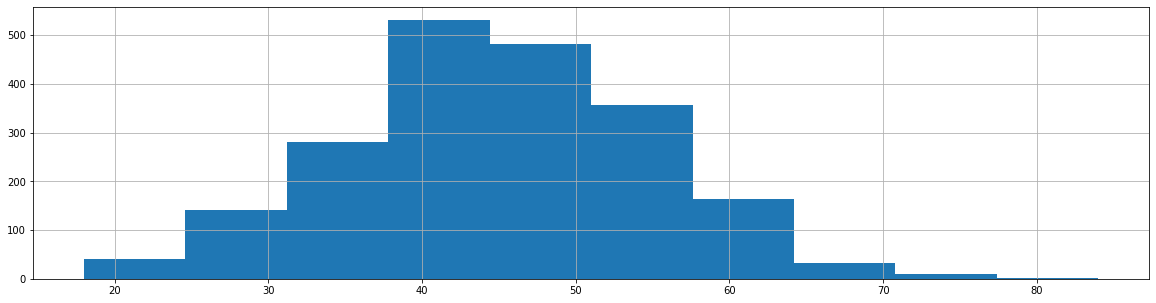

In [17]:
exited_1['Age'].hist(figsize=(20,5))


<AxesSubplot:>

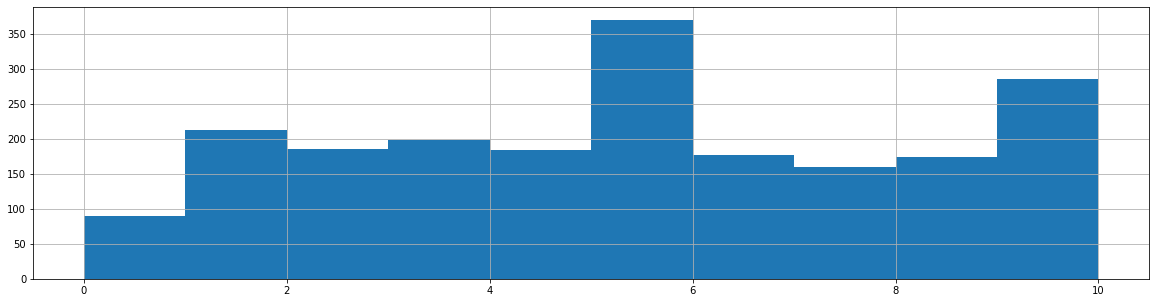

In [18]:
exited_1['Tenure'].hist(figsize=(20,5))


<AxesSubplot:>

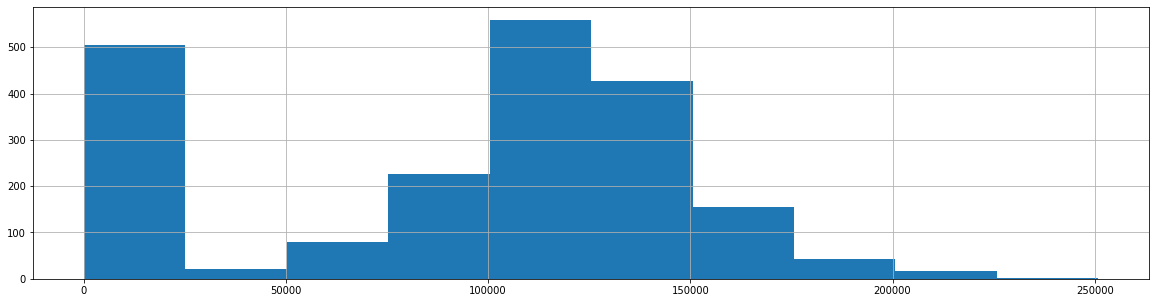

In [19]:
exited_1['Balance'].hist(figsize=(20,5))


<AxesSubplot:>

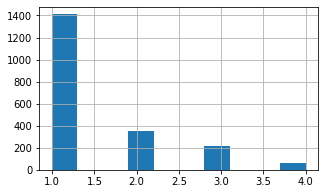

In [20]:
exited_1['NumOfProducts'].hist(figsize=(5,3))

<AxesSubplot:>

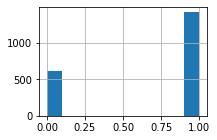

In [21]:
exited_1['HasCrCard'].hist(figsize=(3,2))

<AxesSubplot:>

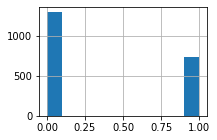

In [22]:
exited_1['IsActiveMember'].hist(figsize=(3,2))

<AxesSubplot:>

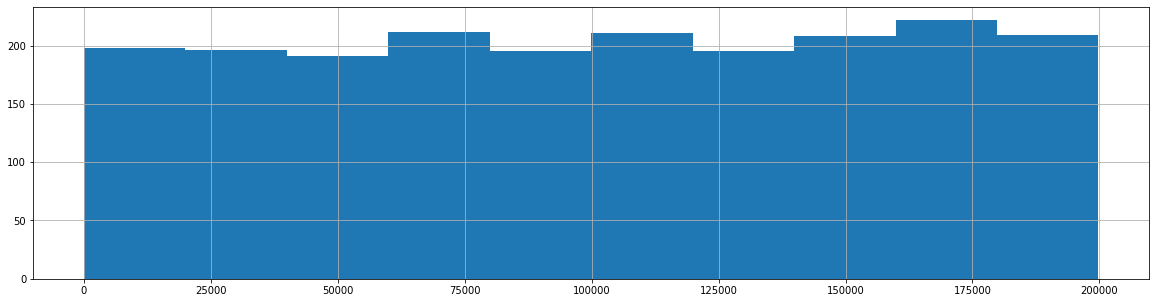

In [23]:
exited_1['EstimatedSalary'].hist(figsize=(20,5))

In [24]:
# Исследуем категориальные признаки. И приведем их к необходимому формату
 
data['Geography'].value_counts() # три значения (France, Germany, Spain). Сделаем прямое кодирование путем OHE
data['Gender'].value_counts()# два значения (М и F). Переведем их к булевым значениям М-1, F-0
data['NumOfProducts'].value_counts()# 4 значения (1,2,3,4). Сделаем прямое кодирование путем OHE



1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [25]:
# осуществим прямое кодирование категориальных признаков
# чтоб избежать дамми-ловушек, удалим колонки первых данных

data=pd.get_dummies(data, drop_first=True)
data.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1
9999,792,28,5.0,130142.79,1,1,0,38190.78,0,0,0,0


In [26]:
# Разобьем данные на две выборки (обучающую и тестовую 25%)
data_train_total, data_test = train_test_split(data, test_size=0.25, random_state=12345)

# Разобьем обучающие данные на две выборки (обучающую и валидационную 25% от общего количества)
data_train, data_valid = train_test_split(data_train_total, test_size=0.3334, random_state=12345)

# проверим, верно ли разбились данные
print('Обучающаяся выборка', len(data_train))
print('Валидационная выборка', len(data_valid))
print('Тестовая выборка', len(data_test))

Обучающаяся выборка 4999
Валидационная выборка 2501
Тестовая выборка 2500


In [27]:
# разобьем таблицы на целеной признак и остальные признаки

features_train = data_train.drop('Exited', axis=1)
target_train = data_train['Exited']
features_valid = data_valid.drop('Exited', axis=1)
target_valid = data_valid['Exited']
features_test = data_test.drop('Exited', axis=1)
target_test = data_test['Exited']

In [28]:
# стандартизуем данные для выборок по конкретным признакам, обучив модель на трейне

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler() 
scaler.fit(features_train[numeric])

features_train_scaled = scaler.transform(features_train[numeric]) 
features_valid_scaled = scaler.transform(features_valid[numeric]) 
features_test_scaled = scaler.transform(features_test[numeric]) 





In [29]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder()
#data_new = onehotencoder.fit_transform(data.values)
#pd.DataFrame(data_new, columns=onehotencoder.categories).head(10)

In [30]:
# проверим вариант модели на обучающей выборке- Дерево решений
# зададим гиперпараметры, которые позволят ограничить обучение модели

best_model = None
best_result = 0

for depth in range(1, 5):
    model = DecisionTreeClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = depth) # обучим модель с заданной глубиной дерева	
    model.fit(features_train, target_train) # обучим модель	
    predictions_valid = model.predict(features_valid) # получим предсказания модели	
    result = accuracy_score(target_valid, predictions_valid) # посчитаем качество модели	
    if result > best_result:
        best_model = model
        best_result = result

probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
print(f'Accuracy лучшей модели Дерево решений: {best_result}, глубина - {depth}') 
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Дерево решений: 0.8560575769692124, глубина - 4
f1: 0.5287958115183246
auc_roc: 0.829617651143872


In [31]:
# проверим вариант модели - Случайный лес

best_model = None
best_result = 0
for est in range(50, 201, 10):
    for depth in range(3, 22, 3):
        model = RandomForestClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = depth, n_estimators = est) # обучим модель с заданной кол-ом деревьев	
        model.fit(features_train, target_train) # обучим модель
        predictions_valid = model.predict(features_valid) # получим предсказания модели
        result = model.score(features_valid, target_valid) # посчитаем качество модели
        if result > best_result:
            best_model = model
            best_result = result
            
probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
     
print(f'Accuracy лучшей модели Случайный лес: {best_result}, кол-во деревьев - {est}, глубина - {depth}')
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Случайный лес: 0.8704518192722911, кол-во деревьев - 200, глубина - 21
f1: 0.5854858548585486
auc_roc: 0.8647101132958988


In [32]:
# проверим вариант модели - Логическая регрессия

model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
model.predict(features_valid) 
model.score(features_valid, target_valid) 

probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print("Accuracy лучшей модели Логическая регрессия:", model.score(features_valid, target_valid))
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Логическая регрессия: 0.7956817273090764
f1: 0.5854858548585486
auc_roc: 0.6781830988710094


Вывод:
В связи  с тем, что практически все признаки у нас категориальные нет возможности проверить корреляцию.
Но построив диаграмму зависимости оттока клиентов от признака, можно заключить следующее:
в основном отток происходит в Германии и Франции, в два раза меньше показали в Испании. Женщины отказываются чаще от услуг банка. Возрастной интервал 38-51 лет. Основные пики отказа на 1 и 10 годе обслуживания. Баланс на момент отказа 0-50 тыс, 100-150тыс. В основном отказники используют один тип продукта. Не наблюдается активность клиента
Наличие кредитной карты и уровень заработной платы не влияет на уровень оттока

Проведя обучение тремя методами на данных с дисбалансом наилучший результат показал метод Случайный лес - кол-во правильных ответов 87%, f1-мера - 0,59, auc_roc составляет 87% вероятности попадания в класс

## Борьба с дисбалансом

При исследовании данных мы видели, что количество признаков везде разное
Произведем 2 варианта борьбы с дисбалансом: увеличение выборки upsample и уменьшение выборки downsample

In [33]:
# создадим функцию для повышение количества значений меньшего класса к преобладающему

def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled 
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)


(7990, 11)
(7990,)


In [34]:
# проверим вариант модели на обучающей выборке- Дерево решений
# зададим гиперпараметры, которые позволят ограничить обучение модели

best_model = None
best_result = 0

for depth in range(1, 5):
    model = DecisionTreeClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = depth) # обучим модель с заданной глубиной дерева	
    model.fit(features_upsampled, target_upsampled) # обучим модель	
    predictions_valid = model.predict(features_valid) # получим предсказания модели	
    result = accuracy_score(target_valid, predictions_valid) # посчитаем качество модели	
    if result > best_result:
        best_model = model
        best_result = result

probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
print(f'Accuracy лучшей модели Дерево решений: {best_result}, глубина - {depth}') 
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Дерево решений: 0.8240703718512595, глубина - 4
f1: 0.5436893203883495
auc_roc: 0.824925593761781


In [35]:
# проверим вариант модели на обучающей выборке- Случайный лес
# зададим гиперпараметры, которые позволят ограничить обучение модели

best_model = None
best_result = 0
for est in range(50, 201, 10):
    for depth in range(3, 22, 3):
        model = RandomForestClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = depth, n_estimators = est) # обучим модель с заданной кол-ом деревьев	
        model.fit(features_upsampled, target_upsampled) # обучим модель
        predictions_valid = model.predict(features_valid) # получим предсказания модели
        result = model.score(features_valid, target_valid) # посчитаем качество модели
        if result > best_result:
            best_model = model
            best_result = result
            
probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
     
print(f'Accuracy лучшей модели Случайный лес: {best_result}, кол-во деревьев - {est}, глубина - {depth}')
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Случайный лес: 0.8620551779288285, кол-во деревьев - 200, глубина - 21
f1: 0.6294307196562835
auc_roc: 0.8648331316097542


In [36]:
# проверим вариант модели на обучающей выборке- Логистическая регрессия
# зададим гиперпараметры, которые позволят ограничить обучение модели

model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_upsampled, target_upsampled) 
model.predict(features_valid) 
model.score(features_valid, target_valid) 

probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print("Accuracy лучшей модели Логическая регрессия:", model.score(features_valid, target_valid))
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Логическая регрессия: 0.646141543382647
f1: 0.6294307196562835
auc_roc: 0.7306067580705967


In [37]:
# создадим функцию для понижения количества значений большего класса к дефицитному

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac = fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction, random_state=12345)] + [target_ones])
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)


(1997, 11)
(1997,)


In [38]:
# проверим вариант модели на обучающей выборке- Дерево решений
# зададим гиперпараметры, которые позволят ограничить обучение модели

best_model = None
best_result = 0

for depth in range(1, 5):
    model = DecisionTreeClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = depth) # обучим модель с заданной глубиной дерева	
    model.fit(features_downsampled, target_downsampled) # обучим модель
    predictions_valid = model.predict(features_valid) # получим предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитаем качество модели
    if result > best_result:
        best_model = model
        best_result = result

probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
print(f'Accuracy лучшей модели Дерево решений: {best_result}, глубина - {depth}') 
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Дерево решений: 0.8144742103158736, глубина - 4
f1: 0.5555555555555556
auc_roc: 0.825747534673307


In [39]:
# проверим вариант модели на обучающей выборке- Случайный лес
# зададим гиперпараметры, которые позволят ограничить обучение модели

best_model = None
best_result = 0
for est in range(50, 201, 10):
    for depth in range(3, 22, 3):
        model = RandomForestClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = depth, n_estimators = est) # обучим модель с заданной кол-ом деревьев	
        model.fit(features_downsampled, target_downsampled) # обучим модель
        predictions_valid = model.predict(features_valid) # получим предсказания модели
        result = model.score(features_valid, target_valid) # посчитаем качество модели
        if result > best_result:
            best_model = model
            best_result = result
            
probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
     
print(f'Accuracy лучшей модели Случайный лес: {best_result}, кол-во деревьев - {est}, глубина - {depth}')
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Случайный лес: 0.7964814074370252, кол-во деревьев - 200, глубина - 21
f1: 0.5875370919881305
auc_roc: 0.8636163415940792


In [40]:
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_downsampled, target_downsampled) 
model.predict(features_valid) 
model.score(features_valid, target_valid) 

probabilities_valid = model.predict_proba(features_valid)        
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print("Accuracy лучшей модели Логическая регрессия:", model.score(features_valid, target_valid))
print('f1:', f1_score(target_valid, predictions_valid))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Логическая регрессия: 0.6453418632546981
f1: 0.5875370919881305
auc_roc: 0.7318944820333736


Вывод: Чтоб алгоритм ошибочно не воспринял один признак важнее другого, приведем все признаки к одинаковому количеству при помощи двух способов:
- увеличить количество значений меньшего  класса к преобладающему классу при поомщи upsampled
- уменьшить количество значений большего класса к дефицитному при помощи downsampled

Лучший результат показал upsampled в модели Случайны лес - кол-во правильных ответов 86%, f1-мера - 0,62, auc_roc составляет 86% вероятности попадания в класс

## Тестирование модели

In [41]:
# проверим вариант модели на тестовой выборке- Случайный лес
# зададим гиперпараметры, которые были наилучшими в валидационной выборке

model = RandomForestClassifier(random_state=12345, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth = 21, n_estimators = 200) # обучим модель с заданной кол-ом деревьев	
model.fit(features_upsampled, target_upsampled) # обучим модель
predictions_test = model.predict(features_test) # получим предсказания модели
result = model.score(features_test, target_test) # посчитаем качество модели
            
probabilities_test = model.predict_proba(features_test)        
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
     
print(f'Accuracy лучшей модели Случайный лес: {result}')
print('f1:', f1_score(target_test, predictions_test))
print('auc_roc:', auc_roc)

Accuracy лучшей модели Случайный лес: 0.8496
f1: 0.6050420168067228
auc_roc: 0.8464802263917627


In [42]:
fpr,tpr,thresholds = roc_curve(target_test, probabilities_one_test)

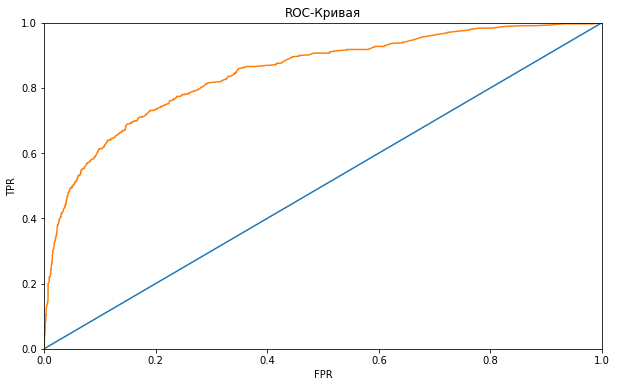

In [43]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-Кривая')
plt.show()


Тестовая выборка показала хорошие результаты - кол-во правильных ответов 73%, f1-мера увеличилась 0,68, а auc_roc составляет 84% вероятности попадания в класс и наша модель достаточно сильно отличается от кривой случайных данных.

ВЫВОД.
Для анализа были предоставлены неполные данные. Около 9% пропусков в данных Tenure, которые могли появиться в следствии технического сбоя или человеческого фактора. В связи   тем, что данные удалять нельзя, чтоб не потерять важную информацию для исследования, было принято решение присвоить всем пропускам 0, т.е. присвоить пропускам категорию 0 лет работы с клиентом.

Был проведен анализ оттока клиентов по диаграммам, при которых были выявлены ряд закономерностей: в основном отток происходит в Германии и Франции, в два раза меньше показали в Испании. Женщины отказываются чаще от услуг банка. Возрастной интервал 38-51 лет. Основные пики отказа на 1 и 10 годе обслуживания. Баланс на момент отказа 0-50 тыс, 100-150тыс. В основном отказники используют один тип продукта. Не наблюдается активность клиента. Наличие кредитной карты и уровень заработной платы не влияет на уровень оттока.

Чтоб постороить модель способную предсказывать поведение клиентов, были построены 3 модели Дерево Решений, Случайный Лес и Логистическая регрессия, при которых наилучший результат показала модель Случайный Лес. Но в связи с тем, что масштаб целевого признака различный 1:4, алгоритм мог некоторые признаки посчитать наиболее важными, чем другие. И чтоб этого избежать мы сбалансировали признаки, продублировав число оттока до размера данных оставшихся клиентов. После построили модель на сбалансированных данных и результат у модели Случайный лес улучшился - кол-во правильных ответов 85%, f1-мера увеличилась 0,60, а auc_roc составляет 85% вероятности попадания в класс и наша модель достаточно сильно отличается от кривой случайных данных.